# FordGoBike Data (2018) Visualization
## by Salomey Bezua

## Introduction
> Ford GoBike is a regional bike-share network designed to enhance sustainable transportation in the San Francisco Bay Area. The initiative allows pickup and drop off of bikes anywhere in the designated locations. It is available in San Frnacisco, San Jose, and the East Bay 24/7.

> The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.





## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from requests import get
from zipfile import ZipFile
import os
import glob
from io import BytesIO
%matplotlib inline

> I will investigate the structure of the data set and the relationships between the attributes

In [8]:
path = r'/Users/salomeybezua/Documents/ALX-PROJECT/Project Template/fordgobike'

In [9]:
all_files = glob.glob(os.path.join(path, "*.csv"))

In [10]:
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)
df.to_csv('fordgobike.csv', index = False)

In [11]:
df = pd.read_csv('fordgobike.csv')

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [13]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1104561,524,2018-07-20 08:25:18.4290,2018-07-20 08:34:02.6360,97.0,14th St at Mission St,37.768265,-122.420110,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,3648,Subscriber,1988.0,Female,No
1116387,418,2018-07-18 17:22:21.0400,2018-07-18 17:29:19.7170,47.0,4th St at Harrison St,37.780955,-122.399749,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2334,Subscriber,1981.0,Male,No
883520,677,2018-12-11 20:30:42.1040,2018-12-11 20:41:59.5260,98.0,Valencia St at 16th St,37.765052,-122.421866,89.0,Division St at Potrero Ave,37.769218,-122.407646,2101,Subscriber,1998.0,Male,No
1845423,628,2018-04-05 06:58:01.4300,2018-04-05 07:08:30.0310,244.0,Shattuck Ave at Hearst Ave,37.873792,-122.268618,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3696,Customer,1996.0,Male,No
1575197,196,2018-10-08 05:52:44.8550,2018-10-08 05:56:00.9740,25.0,Howard St at 2nd St,37.787522,-122.397405,24.0,Spear St at Folsom St,37.789677,-122.390428,3214,Subscriber,1985.0,Male,No
1022816,1023,2018-01-03 08:56:17.6040,2018-01-03 09:13:20.6640,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,321.0,5th at Folsom,37.780146,-122.403071,2089,Subscriber,1975.0,Other,No
504749,640,2018-06-19 17:36:27.8320,2018-06-19 17:47:08.4650,236.0,Market St at 8th St,37.803686,-122.282497,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,347,Subscriber,1982.0,Male,No
801127,797,2018-05-01 08:25:31.5380,2018-05-01 08:38:49.1000,22.0,Howard St at Beale St,37.789756,-122.394643,77.0,11th St at Natoma St,37.773507,-122.416040,3120,Subscriber,1980.0,Male,No
1071393,1194,2018-07-25 09:28:43.5250,2018-07-25 09:48:37.8700,116.0,Mississippi St at 17th St,37.764802,-122.394771,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,204,Subscriber,1979.0,Male,No
777488,407,2018-05-04 17:51:16.8200,2018-05-04 17:58:04.4860,105.0,16th St at Prosper St,37.764285,-122.431804,134.0,Valencia St at 24th St,37.752428,-122.420628,3862,Subscriber,1991.0,Male,Yes


In [121]:
#Check the attributes and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [14]:
#Check the number of rows and columns
df.shape

(1863721, 16)

In [123]:
#Check the statistical description of the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [124]:
#Check for duplicates in the data
df.duplicated().sum()

0

In [125]:
#Check for missing information in the data
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

### Issues with the dataset
- The start and end times are not in the timestamp format
- The id variables(start_station_id ,bike_id ,end_station_id) are not strings
- We can introduce a new column to contain the members age,since the member birth year is available

### Data Cleaning
- In this section, all issues relating to the dataset will be tackled.


In [126]:
#Create a copy to maintain the original dataset
df_clean = df.copy()

#### Fixing columns that have wrong data types

In [128]:

#Datetime format
df_clean['start_time'] = pd.to_datetime(df_clean.start_time)
df_clean['end_time'] = pd.to_datetime(df_clean.end_time)

#Object format
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

#Category Format
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')
df_clean['user_type'] = df_clean['user_type'].astype('category')

#### Test

In [129]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  category      
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(5)
memor

#### Issue 2 - Splitting the start time column to get month,days,time and seconds

In [130]:
# Extract start time and end time hour
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

In [131]:
# Extracting duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

In [132]:
# Extracting start time month 
df_clean['start_time_month'] = df_clean['start_time'].dt.month.astype(int)

In [133]:
# Extracting start time day
df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a')

#### Test

In [134]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,end_time_hour,duration_min,start_time_month,start_time_day
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,1035,Subscriber,1988.0,Male,No,23,0,9,2,Wed
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,1673,Customer,1987.0,Male,No,23,23,15,2,Wed
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3498,Customer,1986.0,Female,No,18,23,309,2,Wed
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3129,Customer,1981.0,Male,No,18,23,309,2,Wed
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,1839,Subscriber,1976.0,Female,Yes,23,23,14,2,Wed


#### Issue 2 - Calculate member's age

In [135]:
#Using current year 2022, let's subtract member_birth_year to get age
df_clean['member_age'] = 2022 - df_clean['member_birth_year']

In [136]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,end_time_hour,duration_min,start_time_month,start_time_day,member_age
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,Subscriber,1988.0,Male,No,23,0,9,2,Wed,34.0
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,Customer,1987.0,Male,No,23,23,15,2,Wed,35.0
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1986.0,Female,No,18,23,309,2,Wed,36.0
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1981.0,Male,No,18,23,309,2,Wed,41.0
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,Subscriber,1976.0,Female,Yes,23,23,14,2,Wed,46.0


In [137]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  category      
 16  start_time_hour          int64         
 17  end_time_hour            in

In [139]:
df_clean.member_age.describe()


count    1.753003e+06
mean     3.891204e+01
std      1.044289e+01
min      2.200000e+01
25%      3.100000e+01
50%      3.700000e+01
75%      4.400000e+01
max      1.410000e+02
Name: member_age, dtype: float64

- From the descriptive statistics above, the mean age is 39 yrs and 75% of members are below the age of 44.

In [140]:
df_clean.member_age.describe(percentiles=[.99])

count    1.753003e+06
mean     3.891204e+01
std      1.044289e+01
min      2.200000e+01
50%      3.700000e+01
99%      6.900000e+01
max      1.410000e+02
Name: member_age, dtype: float64

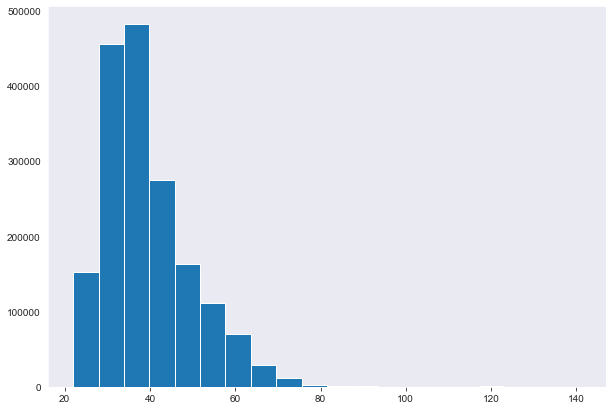

In [141]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df_clean.member_age, bins=20)
plt.show()

#### From above, it can be seen the 99 percentile is below 67 and the histogram shows majority of members being within 22 yrs and 50. Lets limit the data to members of age 69

In [142]:
# Only keep the records where age under 69.It automatically removes null values.
df_clean = df_clean[df_clean['member_age'] <= 69]

In [143]:
#Convert age and birth year to integer
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173333 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173333 non-null  int64         
 1   start_time               173333 non-null  datetime64[ns]
 2   end_time                 173333 non-null  datetime64[ns]
 3   start_station_id         173333 non-null  object        
 4   start_station_name       173138 non-null  object        
 5   start_station_latitude   173333 non-null  float64       
 6   start_station_longitude  173333 non-null  float64       
 7   end_station_id           173333 non-null  object        
 8   end_station_name         173138 non-null  object        
 9   end_station_latitude     173333 non-null  float64       
 10  end_station_longitude    173333 non-null  float64       
 11  bike_id                  173333 non-null  object        
 12  user_type       

In [144]:
df_clean.shape

(1736572, 22)

In [145]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,end_time_hour,duration_min,start_time_month,start_time_day,member_age
1600500,197,2018-10-03 18:20:10.290,2018-10-03 18:23:28.165,95.0,Sanchez St at 15th St,37.766219,-122.431060,120.0,Mission Dolores Park,37.761420,...,Subscriber,1989,Male,No,18,18,3,10,Wed,33
1783184,1426,2018-04-20 13:45:15.945,2018-04-20 14:09:02.892,49.0,S Park St at 3rd St,37.780760,-122.394989,6.0,The Embarcadero at Sansome St,37.804770,...,Customer,1993,Male,No,13,14,23,4,Fri,29
1809717,1008,2018-04-13 23:32:56.696,2018-04-13 23:49:45.611,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,86.0,Market St at Dolores St,37.769305,...,Subscriber,1992,Male,No,23,23,16,4,Fri,30
66229,902,2018-02-10 13:30:35.371,2018-02-10 13:45:38.276,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,97.0,14th St at Mission St,37.768265,...,Subscriber,1988,Female,No,13,13,15,2,Sat,34
642038,910,2018-05-29 08:57:13.019,2018-05-29 09:12:23.387,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1989,Male,No,8,9,15,5,Tue,33


#### Save Clean Data

In [146]:
df_clean.to_csv('fordgobike_master_clean.csv', index=False)

#### Read the cleaned data

In [15]:
df_clean = pd.read_csv('fordgobike_master_clean.csv')

### What is the structure of your dataset?

> The project uses data from the year 2018 (January to December). 
The dataset has 1736572 rows and 22 columns. The dataset contains the following variables:
- Duration Sec               
- Start time                 
- End time                   
- Start_station_id          
- start_station_name        
- start_station_latitude    
- start_station_longitude    
- end_station_id            
- end_station_name           
- end_station_latitude       
- end_station_longitude      
- bike_id                   
- user_type                  
- member_birth_year          
- member_gender             
- Bike_share_for_all_trip    
- Member Age           
- Start_time_month_num       
- Start_time_weekday         
- Start_time_hour            
- End_time_hour              
- Duration Minutes               

### What is/are the main feature(s) of interest in your dataset?

> Each trip from the dataframe has multiple categories. The main features of interest include the start and end time , the duration and the type of users.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Start_time_weekday         
- Start_time_hour            
- End_time_hour              
- Duration Minutes
- user_type                  
- member_birth_year          
- member_gender 

## Univariate Exploration

> In this section,I will investigate distributions of individual variables. 

### How long does the average trip take?
#### Trip Duration in Seconds

In [36]:
sb.set_style('dark', {'xtick.bottom': True})
# Setting the color palette
base_color = sb.color_palette('Dark2', 8)[0]

#Function to store labelling
def label(title,x_label,y_label):
    plt.title(title,y=1.05, fontsize=14, fontweight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=95)

In [17]:
#Checking the descriptive statistics of the duration
df_clean['duration_sec'].describe()

count    1.736572e+06
mean     7.780491e+02
std      1.986430e+03
min      6.100000e+01
25%      3.450000e+02
50%      5.430000e+02
75%      8.410000e+02
max      8.628100e+04
Name: duration_sec, dtype: float64

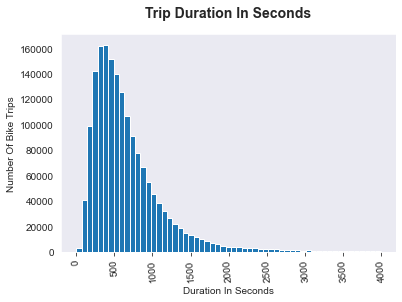

In [37]:
bin_edges = np.arange(0,4000,70)
plt.hist(data=df_clean,x='duration_sec',bins=bin_edges)
label('Trip Duration In Seconds','Duration In Seconds','Number Of Bike Trips');

#### Trip Duration in Minutes

In [150]:
#Checking the descriptive statistics of the duration
df_clean['duration_min'].describe()

count    1.736572e+06
mean     1.247599e+01
std      3.310829e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

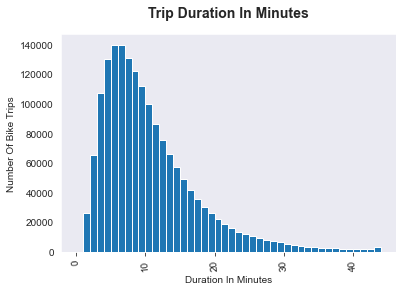

In [38]:
bin_edges = np.arange(0,45,1)
plt.hist(data=df_clean,x='duration_min',bins=bin_edges)
label('Trip Duration In Minutes','Duration In Minutes','Number Of Bike Trips');


> The statistics describes the duration of the bike rides. It is observed that majority of the trips are under 18 minutes(1000 seconds). 

#### Number of the Bike Use by hour

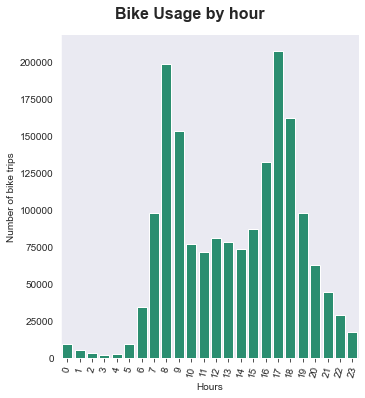

In [152]:
h = sb.catplot(data=df_clean,x='start_time_hour',kind='count',color=base_color)
h.set_axis_labels('Hours','Number of bike trips')
h.fig.suptitle('Bike Usage by hour',y=1.05,fontsize=16,fontweight='bold')
h.set_xticklabels(rotation=75)

> The distribution is bimodal. There are two peaks in the day, which can be termed as the 'rush hours'. The morning hours between 7am and 9am and the evening hours between 4pm and 6pm. This shows the bike usage are primarily to commute to and from work.

#### Number of the Bike Use by Day

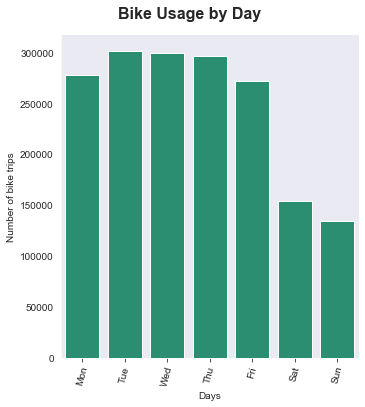

In [153]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
d = sb.catplot(data=df_clean,x='start_time_day',kind='count',color=base_color,order=days)
d.set_axis_labels('Days','Number of bike trips')
d.fig.suptitle('Bike Usage by Day',y=1.05,fontsize=16,fontweight='bold')
d.set_xticklabels(rotation=75)

> It is observed the majority of trips is made during the week days with Tuesday to Thursday recording the highest trip. It is less during the weekends.

#### Number of the Bike Use by Months

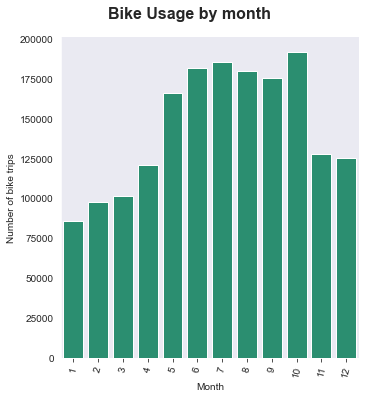

In [154]:
m = sb.catplot(data=df_clean,x='start_time_month',kind='count',color=base_color)
m.set_axis_labels('Month','Number of bike trips')
m.fig.suptitle('Bike Usage by month',y=1.05,fontsize=16,fontweight='bold')
m.set_xticklabels(rotation=75)

#### Bike Usage by Age

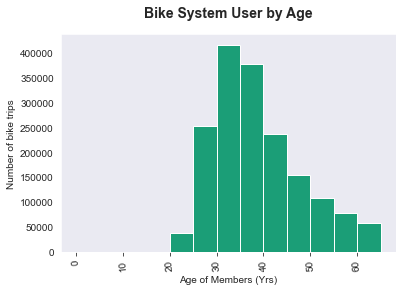

In [39]:
bin_edges = np.arange(0, 70, 5)
plt.hist(data=df_clean,x='member_age',bins=bin_edges,color=base_color)
label('Bike System User by Age','Age of Members (Yrs)','Number of bike trips');

#### Distribution of User Types

In [ ]:
#Distribution of type of users
data = df_clean['user_type'].value_counts()/df_clean['user_type'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('User Types');

In [160]:
userTypes = df_clean.user_type.value_counts()
userTypes

Subscriber    1535165
Customer       201407
Name: user_type, dtype: int64

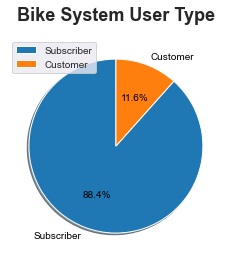

In [164]:
plt.pie(userTypes, labels = userTypes.index, startangle = 90, autopct= '%1.1f%%',shadow ='True',textprops={'color':'black'});
plt.title('Bike System User Type', y=1.05, fontsize=18, fontweight='bold');
plt.legend()

> The majority of users are subscribers with a percentage of 88%

### Bike System by Gender

In [165]:
Gender = df_clean.member_gender.value_counts()
Gender

Male      1273975
Female     435978
Other       26619
Name: member_gender, dtype: int64

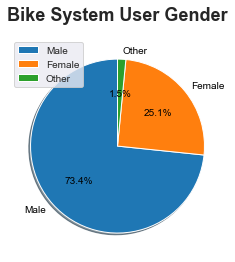

In [166]:
plt.pie(Gender, labels = Gender.index, startangle = 90, autopct= '%1.1f%%',shadow ='True',textprops={'color':'black'});
plt.title('Bike System User Gender', y=1.05, fontsize=18, fontweight='bold');
plt.legend()

> From the chart above, it is observed that the majority of users are male, representing 73.4% of the total and 25.1% representing the female users

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed a number of data wrangling on the dataset. So it took care of any transformations needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The member birth year had an unusual distribution where the maximum age was about 141 years. 99% of the members were between 22 and 69, so i removed members older than 69 years.

## Bivariate Exploration

> In this section,I investigate relationships between pairs of variables in the
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Distribution of the Duration by User Type

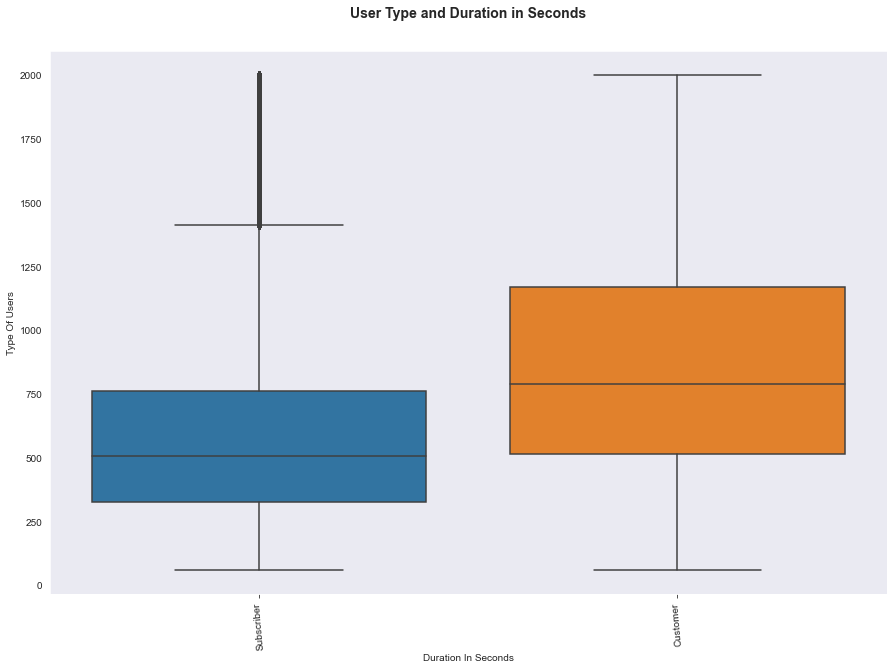

In [40]:

plt.figure(figsize = [15, 10])
majority = df_clean[df_clean['duration_sec'] < 2000]
sb.boxplot(data =majority, x='user_type', y='duration_sec')
label('User Type and Duration in Seconds','Duration In Seconds','Type Of Users');


> Customers generally take longer trips as compared to Subscribers.

#### User type and Day

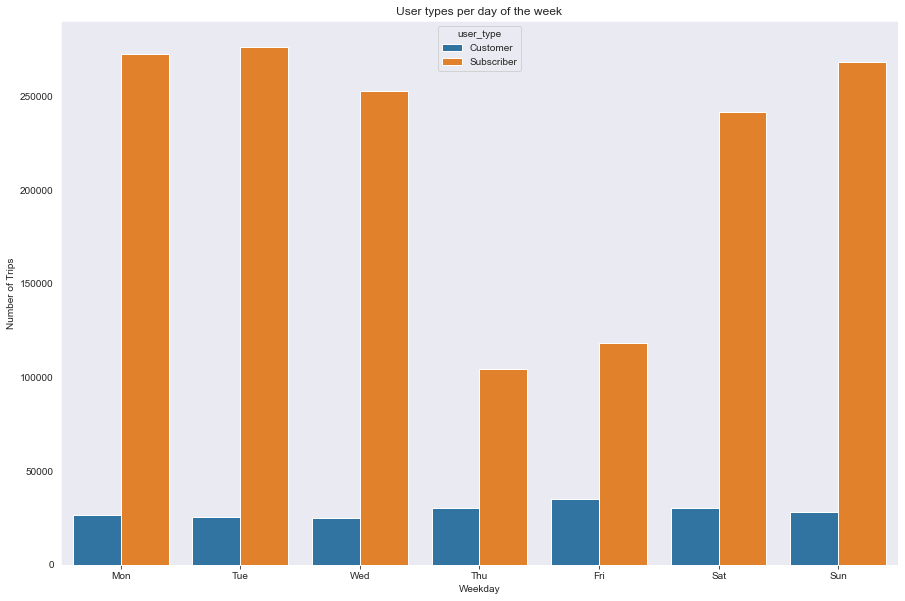

In [205]:
plt.figure(figsize=[15,10])
ax = sb.countplot(data = df_clean, x = 'start_time_day', hue = 'user_type')


ticks = [0, 1, 2, 3, 4, 5, 6]
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks, days)
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('User types per day of the week')
plt.savefig('user_type_dayoftheweek.png');

> There is a decline in subscribers trip on thursday and friday with little change to the customers trip

#### Now let's view each user type on its own.

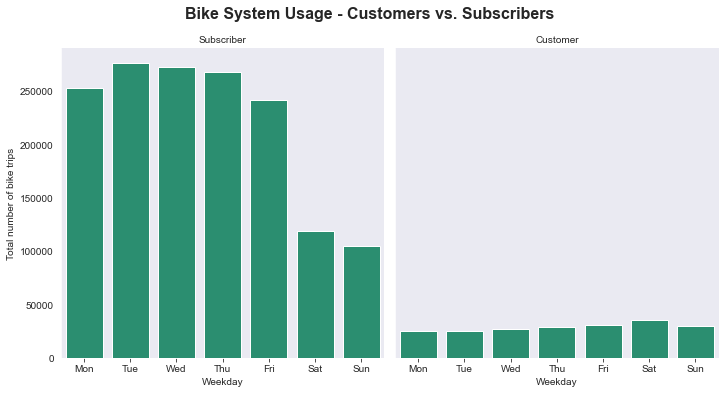

In [19]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
t = sb.catplot(data=df_clean,x='start_time_day',col='user_type',color=base_color,order=days,kind='count')
t.set_axis_labels('Weekday','Total number of bike trips')
t.set_titles("{col_name}")
plt.suptitle('Bike System Usage - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');


It is observed that Subscribers record a high patronize of the bikes during the weekdays with a low usage on weekends(Saturday & Sunday).
Customers on the other hand record low usage of the bike system generally though there is a small increase in use on weekends.

#### A line chart of the user type

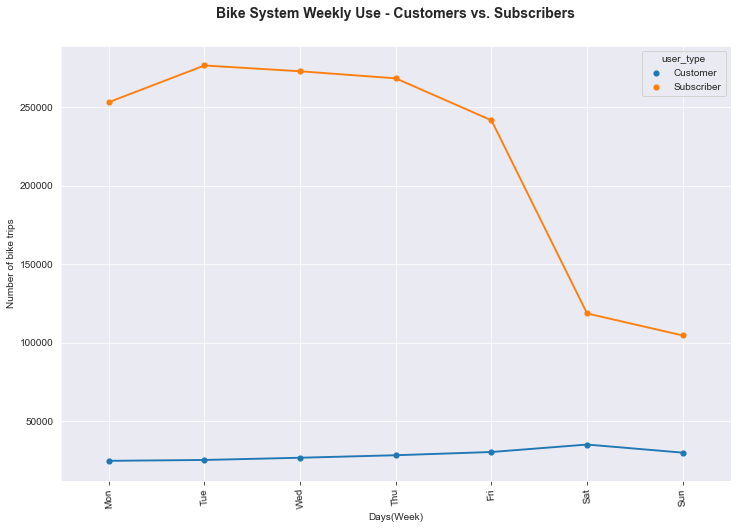

In [41]:
plt.figure(figsize=(12, 8))
df_clean_user_week = df_clean.groupby(['start_time_day', 'user_type']).size().reset_index()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_clean_user_week, x='start_time_day', y=0, hue = 'user_type', scale=.7, order = days);
label('Bike System Weekly Use - Customers vs. Subscribers','Days(Week)','Number of bike trips');
plt.grid()

> The graph above gives a vivid description of the Usage. For subscribers, there is an increase on Tuesday and decrease on Saturday and Sunday.

## Multivariate Exploration

> In this section, Plots of three or more variables will be investigated.

#### Distribution of the Gender by User Type

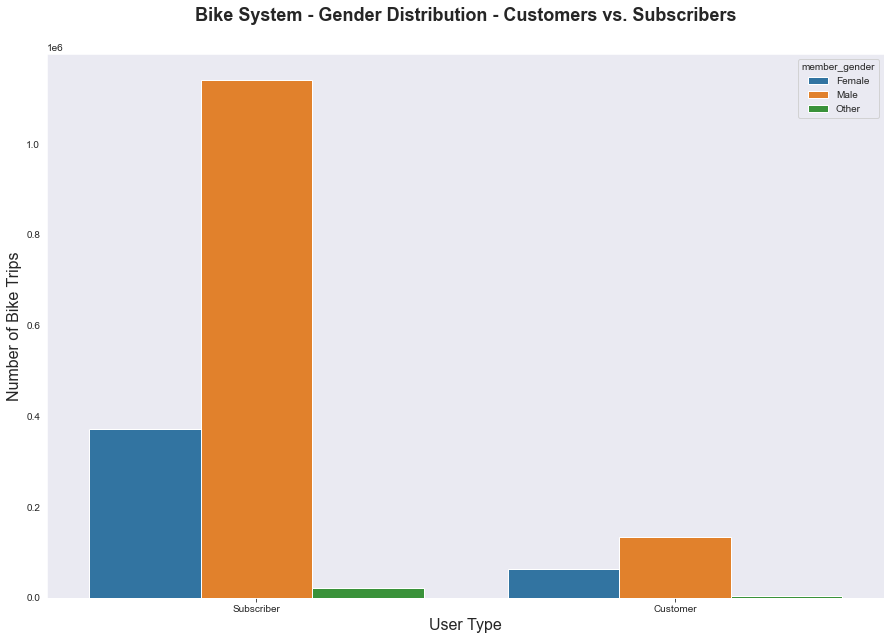

In [212]:
gen_order = df_clean.user_type.value_counts().index
plt.figure(figsize = [15, 10])
g = sb.countplot(data=df_clean,x='user_type',hue='member_gender',order= gen_order)
g.set_xlabel('User Type',fontsize=16)
g.set_ylabel('Number of Bike Trips',fontsize=16);
plt.title('Bike System - Gender Distribution - Customers vs. Subscribers', y=1.05, fontsize=18, fontweight='bold');


> It is observed that Males use the system more often than females.

#### Which Age Group uses the Bike sytem often?

In [29]:
df_clean['member_age_bins'] = df_clean['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 60<x<=70
                                                  else '70 - 80' if 70<x<=80
                                                  else x)

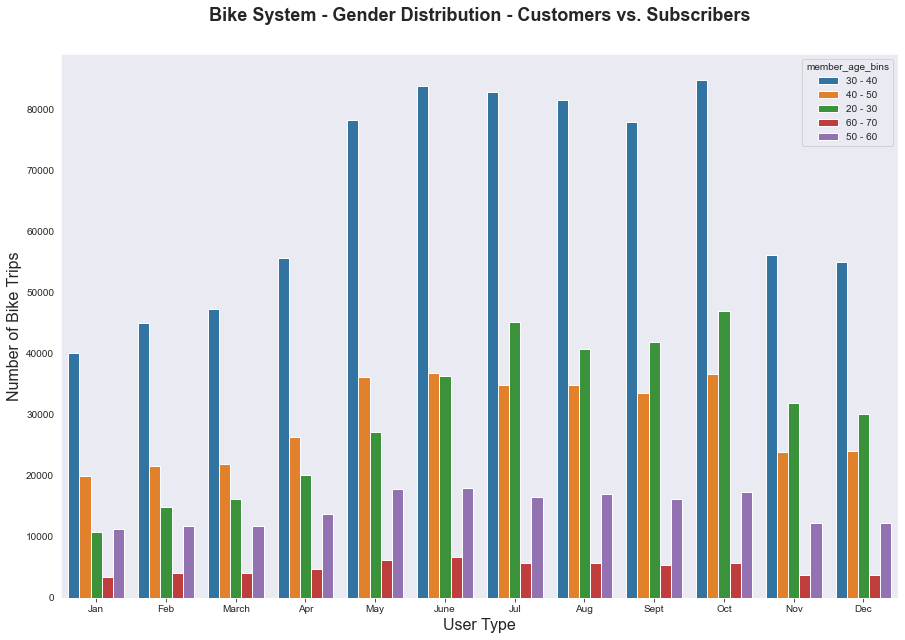

In [31]:

plt.figure(figsize = [15, 10])

g = sb.countplot(data=df_clean,x='start_time_month',hue='member_age_bins')
ticks = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov','Dec']
plt.xticks(ticks, months)
g.set_xlabel('User Type',fontsize=16)
g.set_ylabel('Number of Bike Trips',fontsize=16);
plt.title('Bike System - Gender Distribution - Customers vs. Subscribers', y=1.05, fontsize=18, fontweight='bold');

> We can clearly see (30-40) age group uses the system often. It is observed that age group(40-50) usage increases from January to May and declines from July to November.
Surprisingly, age group (20-30) Increases in the summertime with a peak in October.

#### Gender and Age usage

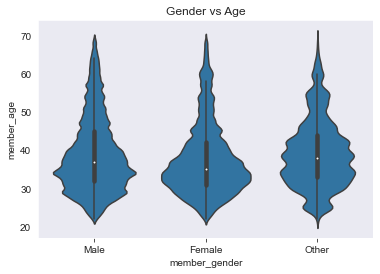

In [34]:
d = df_clean[['member_gender', 'member_age']][df_clean.member_age < 70]
plt.title('Gender vs Age');
sb.violinplot(data=d, x='member_gender', y='member_age', color=sb.color_palette()[0]);


> Females in the (30-35) age group use the bike system more often than the other genders.

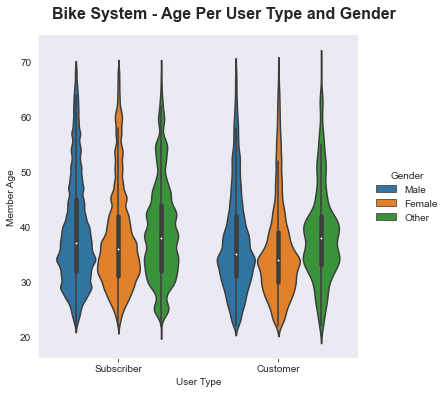

In [51]:
d = df_clean[['member_gender', 'member_age','user_type']][df_clean.member_age < 70]
g = sb.catplot(data=d, x='user_type', y="member_age", hue="member_gender", kind="violin");

g.set_axis_labels("User Type", "Member Age")
g._legend.set_title('Gender')
g.fig.suptitle('Bike System - Age Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

> Female Subcribers in the (30-35) age group use the bike system more often than the other genders.
> The other gender has more customer users aged 35 and 40 yrs.
> The male subscribers also have more users aged 29 and 35 yrs.

#### Plots  Customer vs Subscibers

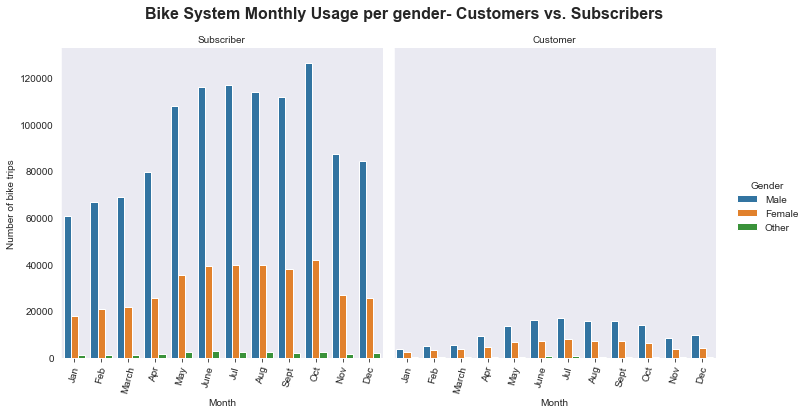

In [32]:
g = sb.catplot(data=df_clean,x='start_time_month',col='user_type',hue='member_gender',kind='count')
ticks = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov','Dec']
plt.xticks(ticks, months)
g.set_axis_labels('Month','Number of bike trips')
g.set_titles("{col_name}")
g._legend.set_title('Gender')
plt.suptitle('Bike System Monthly Usage per gender- Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=75);

- It is observed that for subscribers, there is alot of demand from May to October and a decline in November through to March of the following year. This can be attributed to the Seasonal change. 
- Similarly, this trend is observed for customers. The ratio of Males to Females is quite high for Subscibers as compared to the ratio for Customers


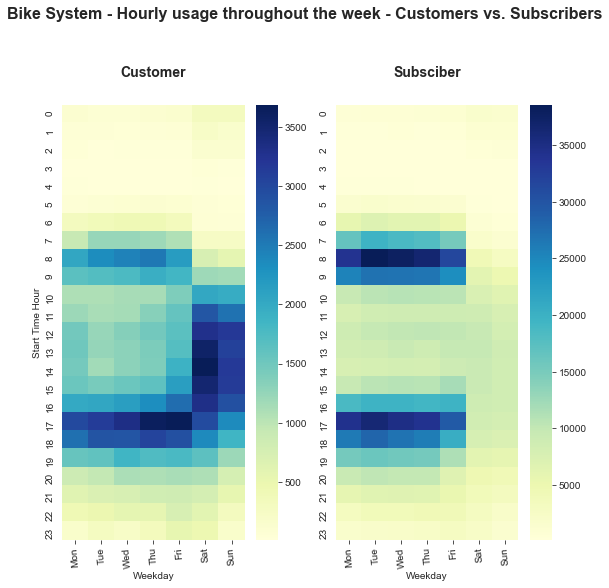

In [55]:
# Let's set the weekday order
df_clean['start_time_day'] =  pd.Categorical(df_clean['start_time_day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Bike System - Hourly usage throughout the week - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');


#Plotting a heatmap for Subscribers
plt.subplot(1,2,2)
df_sub = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
df_sub = df_sub.pivot('start_time_hour','start_time_day','bike_id')
sb.heatmap(df_sub,cmap="YlGnBu")
label('Subsciber','Weekday','');

#Plotting a heatmap for Customers
plt.subplot(1,2,1)
df_cust = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
df_cust = df_cust.pivot('start_time_hour','start_time_day','bike_id')
sb.heatmap(df_cust,cmap="YlGnBu")
label('Customer','Weekday','Start Time Hour');



The heatmap describes the different trends for the subscribers and customers. 
#### Customers 
- Customers ride around 8-9a.m and 4-6p.m with a peak on Thursday and Friday at 5pm. Most rides are done during the weekends recording a peak at 1-2p.m on Saturdays

#### Subscribers
- It is pretty evident that subcribers commute to work since there is hardly any use on weekends.
